<a href="https://colab.research.google.com/github/hafizamzar/cui-analysis-fyp/blob/main/om_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage.color import rgb2gray
from skimage import io

In [3]:
clean_im_2 = cv2.imread('input/2.jpg')
clean_im_3 = cv2.imread('input/3.jpg')
clean_im_4 = cv2.imread('input/4.jpg')
clean_im_7 = cv2.imread('input/7.jpg')

In [4]:
#2
reshape_2 = clean_im_2.reshape((-1,3))
reshape_2 = np.float32(reshape_2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 2
attempts = 10

ret,label,center = cv2.kmeans(reshape_2,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
res2 = res.reshape((clean_im_2.shape))

In [5]:
#3
reshape_3 = clean_im_3.reshape((-1,3))
reshape_3 = np.float32(reshape_3)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 2
attempts = 10

ret,label,center = cv2.kmeans(reshape_3,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
res3 = res.reshape((clean_im_3.shape))

In [6]:
#4
reshape_4 = clean_im_4.reshape((-1,3))
reshape_4 = np.float32(reshape_4)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 2
attempts = 10

ret,label,center = cv2.kmeans(reshape_4,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
res4 = res.reshape((clean_im_4.shape))

In [7]:
#5
reshape_7 = clean_im_7.reshape((-1,3))
reshape_7 = np.float32(reshape_7)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 2
attempts = 10

ret,label,center = cv2.kmeans(reshape_7,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
res7 = res.reshape((clean_im_7.shape))

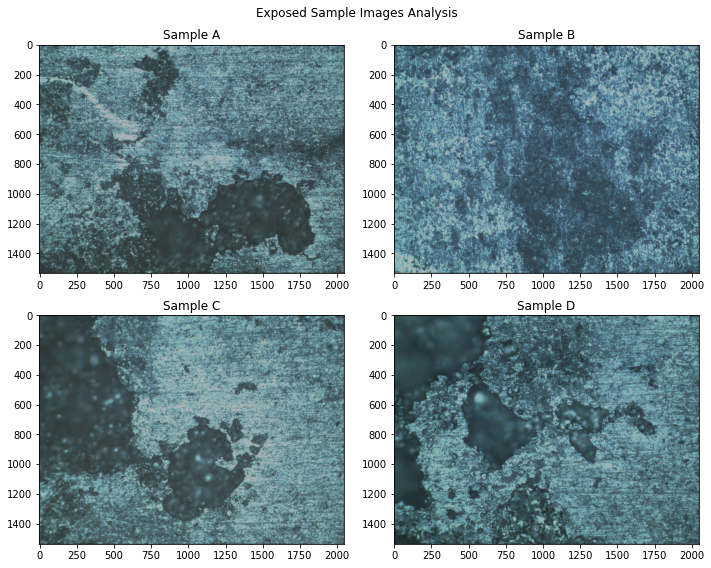

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(clean_im_2)
ax[0].set_title("Sample A")
ax[1].imshow(clean_im_3)
ax[1].set_title("Sample B")
ax[2].imshow(clean_im_4)
ax[2].set_title("Sample C")
ax[3].imshow(clean_im_7)
ax[3].set_title("Sample D")

fig.tight_layout()
fig.subplots_adjust(top=.92)
fig.suptitle('Exposed Sample Images Analysis')
plt.show()

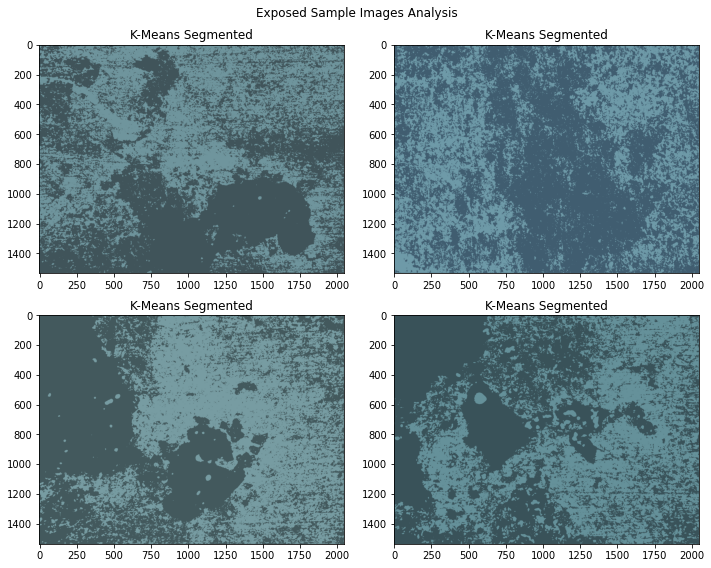

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(res2)
ax[0].set_title("K-Means Segmented")
ax[1].imshow(res3)
ax[1].set_title("K-Means Segmented")
ax[2].imshow(res4)
ax[2].set_title("K-Means Segmented")
ax[3].imshow(res7)
ax[3].set_title("K-Means Segmented")

fig.tight_layout()
fig.subplots_adjust(top=.92)
fig.suptitle('Exposed Sample Images Analysis')
plt.show()

In [18]:
cv2.imwrite('output/Segmented_2.jpg', res2)
cv2.imwrite('output/Segmented_3.jpg', res3)
cv2.imwrite('output/Segmented_4.jpg', res4)
cv2.imwrite('output/Segmented_7.jpg', res7)

True

The percentage of bright pixels is:  57.2450319925944


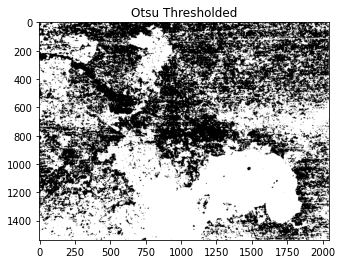

In [11]:
#Segmented 2
from skimage.filters import threshold_otsu

to_otsu2 = io.imread("Segmented_2.jpg", as_gray=True)

thresh = threshold_otsu(to_otsu2)

binary2 = to_otsu2 <= thresh
plt.title('Otsu Thresholded')
plt.imshow(binary2, cmap='gray')
print("The percentage of bright pixels is: ", 
      (np.sum(binary2==1)*100)/(np.sum(binary2==1)+(np.sum(binary2==0))))

The percentage of bright pixels is:  63.244946797688804


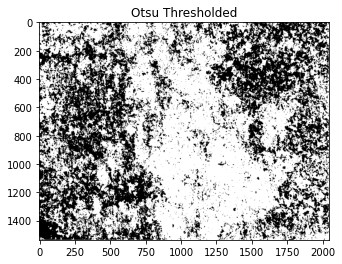

In [12]:
#Segmented 3
from skimage.filters import threshold_otsu

to_otsu3 = io.imread("Segmented_3.jpg", as_gray=True)

thresh = threshold_otsu(to_otsu3)

binary = to_otsu3 <= thresh
plt.title('Otsu Thresholded')
plt.imshow(binary, cmap='gray')
print("The percentage of bright pixels is: ", 
      (np.sum(binary==1)*100)/(np.sum(binary==1)+(np.sum(binary==0))))

The percentage of bright pixels is:  54.88589604695638


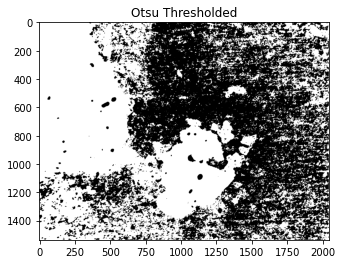

In [13]:
#Segmented 4
from skimage.filters import threshold_otsu

to_otsu4 = io.imread("Segmented_4.jpg", as_gray=True)

thresh = threshold_otsu(to_otsu4)

binary = to_otsu4 <= thresh
plt.imshow(binary, cmap='gray')
plt.title('Otsu Thresholded')
print("The percentage of bright pixels is: ", 
      (np.sum(binary==1)*100)/(np.sum(binary==1)+(np.sum(binary==0))))

The percentage of bright pixels is:  58.01095962524414


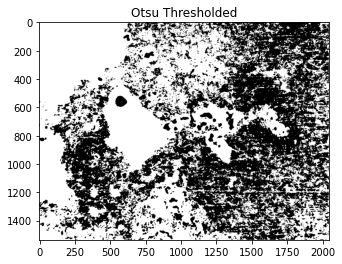

In [14]:
#Segmented 7
from skimage.filters import threshold_otsu

to_otsu7 = io.imread("Segmented_7.jpg", as_gray=True)

thresh = threshold_otsu(to_otsu7)

binary = to_otsu7 <= thresh
plt.title('Otsu Thresholded')
plt.imshow(binary, cmap='gray')
print("The percentage of bright pixels is: ", 
      (np.sum(binary==1)*100)/(np.sum(binary==1)+(np.sum(binary==0))))

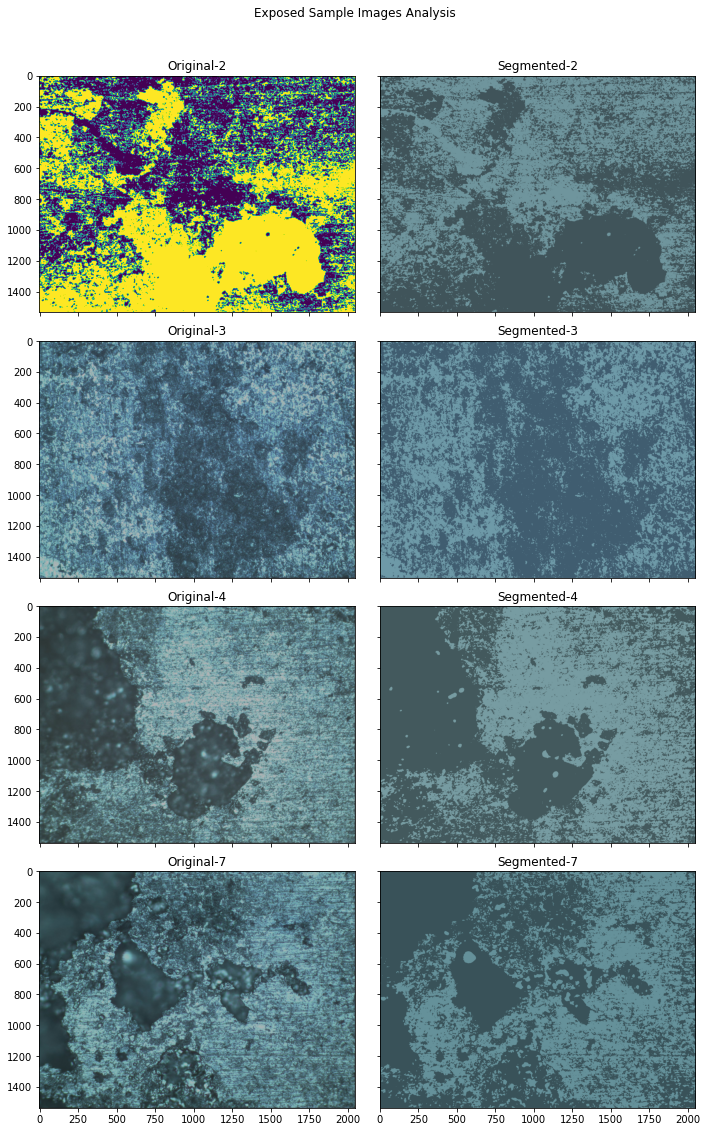

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(10, 16), sharex = 'col', sharey = 'row')
ax = axes.ravel()

ax[0].imshow(binary2)
ax[0].set_title("Original-2")
ax[1].imshow(res2)
ax[1].set_title("Segmented-2")
ax[2].imshow(clean_im_3)
ax[2].set_title("Original-3")
ax[3].imshow(res3)
ax[3].set_title("Segmented-3")
ax[4].imshow(clean_im_4)
ax[4].set_title("Original-4")
ax[5].imshow(res4)
ax[5].set_title("Segmented-4")
ax[6].imshow(clean_im_7)
ax[6].set_title("Original-7")
ax[7].imshow(res7)
ax[7].set_title("Segmented-7")

fig.tight_layout()
fig.subplots_adjust(top=.92)
fig.suptitle('Exposed Sample Images Analysis')
plt.show()